### Tahap 1: Import Library yang Dibutuhkan

</br>Pada tahap ini saya akan mengimport library yang saya butuhkan untuk menyelesaikan kompetisi 'Titanic - Machine Learning from Disaster' mulai dari library untuk membaca data, mengolah data, hingga membuat model dan memvisualisasikan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb

---

### Tahap 2: Memuat Data

</br>Pada tahap ini, saya akan memuat data yang ada menggunakan .read() dari pandas dan menampilkan head datanya baik itu data train maupun data test.

In [2]:
# membuat variabel df_train untuk membaca dataset train dan test

df_train = pd.read_csv('train.csv')

df_test = pd.read_csv('test.csv')


# menampilkan data train dan test (head)

print("Tampilkan data teratas dari data train:")
display(df_train.head())
print("\n")

print("Tampilkan data teratas dari data test:")
display(df_test.head())
print("\n")


# menampilkan ukuran data (baris, kolom)

print(f"\nDimensi data train    : {df_train.shape}")
print(f"Dimensi data test     : {df_test.shape}")

Tampilkan data teratas dari data train:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




Tampilkan data teratas dari data test:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S





Dimensi data train    : (891, 12)
Dimensi data test     : (418, 11)


In [3]:
kolom_hilang = set(df_train.columns) - set(df_test.columns)
print(f"Kolom yang ada di Train tapi tidak ada di Test: {kolom_hilang}")

Kolom yang ada di Train tapi tidak ada di Test: {'Survived'}


### Analisis

</br>Terlihat bahwa pada data test tidak ada kolom 'Survived' seperti yang ada pada data train. Sesuai dengan syarat untuk menyelesaikan kompetisi ini, saya disuruh untuk melakukan prediksi siapakah yang akan 'Die' or 'Survive' pada data test menggunakan model Machine Learning yang akan saya buat setelah ini.

---

### Tahap 3: Mengecek Data Kosong di Tiap Kolom dan Tipe Data di Tiap Kolom

</br>Pada tahap ini, saya akan mengecek data kosong yang ada di tiap kolom berapa dan mengecek tipe data di tiap kolomnya juga.
* Mengecek data kosong di tiap kolom akan membantu saya untuk mengantisipasi menggunakan apa akan saya isi data kosong tersebut.
* Mengecek tipe data tiap kolom akan membantu saya dalam mengubah tipe data yang bukan numerik menjadi numerik dan mengeliminasi kolom yang tidak dibutuhkan untuk menghasilkan model Machine Learning yang akan saya hasilkan.

In [4]:
# Cek data kosong dan tipe data di data train dan data test

print("+++++ Informasi data train +++++")
print("Jumlah Data Kosong:")
print(df_train.isnull().sum())
print("\nTipe Data:")
print(df_train.dtypes)

print("\n" + "="*40 + "\n")

print("+++++ Informasi data test +++++")
print("Jumlah Data Kosong:")
print(df_test.isnull().sum())
print("\nTipe Data:")
print(df_test.dtypes)

+++++ Informasi data train +++++
Jumlah Data Kosong:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Tipe Data:
PassengerId      int64
Survived         int64
Pclass           int64
Name               str
Sex                str
Age            float64
SibSp            int64
Parch            int64
Ticket             str
Fare           float64
Cabin              str
Embarked           str
dtype: object


+++++ Informasi data test +++++
Jumlah Data Kosong:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Tipe Data:
PassengerId      int64
Pclass           int64
Name               str
Sex                str
Age            float64
S

### Analisis Informasi

</br>Dari pengecekan informasi di data train dan test, saya temukan beberapa informasi berikut:
</br>
</br>1 . Data Train
</br>---> Data Kosong ada pada:
* Age (177 data kosong)
* Cabin (687 data kosong)
* Embarked (2 data kosong)
</br>

</br>2 . Data Test
</br>---> Data kosong ada pada:
* Age (86 data kosong)
* Fare (1 data kosong)
* Cabin (327 data kosong)

---

### Tahap 4: Mengisi Data Kosong pada Age dan Fare

</br>Pada tahap ini, saya akan mengisi data kosong (NaN) pada kolom Age di data test dan train serta mengisi data kosong yang cuma 1 di data test pada kolom Fare.
</br>Data kosong akan saya isi menggunakan nilai median agar tidak terlihat kesenjangan yang begitu besar.

In [5]:
# menghitung nilai tengah (median) Age dari data train

median_age = df_train['Age'].median()

# mwngisi nilai tengah tersebut ke kolom Age yang kosong di data train dan test

df_train['Age'] = df_train['Age'].fillna(median_age)
df_test['Age'] = df_test['Age'].fillna(median_age)

# menghitung nilai tengah (median) Fare dari data test

median_fare = df_test['Fare'].median()

# mengisi nilai tengah tersebut ke kolom Fare yang kosong di test

df_test['Fare'] = df_test['Fare'].fillna(median_fare)

# Cek ulang data NaN

print("Sisa data kosong di Age (Train):", df_train['Age'].isnull().sum())
print("Sisa data kosong di Age (Test):", df_test['Age'].isnull().sum())
print("Sisa data kosong di Fare (Test):", df_test['Fare'].isnull().sum())

Sisa data kosong di Age (Train): 0
Sisa data kosong di Age (Test): 0
Sisa data kosong di Fare (Test): 0


---

### Tahap 5: Menghapus Kolom Cabin dan Mengisi Data Embarked

</br>Pada tahap ini, saya akan menghapus kolom 'Cabin' karena terlalu banyaknya data yang kosong dan sangat tidak mungkin untuk diisi dengan data median, modus, maupun data informasi lainnya. Jadi, lebih baik jika saya hapus data Cabin.
</br>Selanjutnya, saya akan mengisi 2 data yang kosong pada kolom 'Embarked' di data train menggunakan modus 'Embarked' di data train itu sendiri.

In [6]:
# mencari data 'Embarked' yang paling sering muncul di data train

modus_embarked = df_train['Embarked'].mode()[0]
print(f"Pelabuhan terbanyak adalah: {modus_embarked}")

# mengisi data kosong menggunakan modus

df_train['Embarked'] = df_train['Embarked'].fillna(modus_embarked)
df_test['Embarked'] = df_test['Embarked'].fillna(modus_embarked)

# membuang kolom 'Cabin' di data test dan train

df_train = df_train.drop(columns=['Cabin'])
df_test = df_test.drop(columns=['Cabin'])

# cek ulang

print("Total data kosong di train:", df_train.isnull().sum().sum())
print("Total data kosong di test:", df_test.isnull().sum().sum())

Pelabuhan terbanyak adalah: S
Total data kosong di train: 0
Total data kosong di test: 0


---

### Tahap 6: Menghapus Kolom 'Name', 'Ticket', dan 'PassengerId'

</br>Pada tahap ini, saya akan membuang ketiga kolom tersebut karena memang kolom tersebut tidak dibutuhkan karena isinya berupa data teks yang acak-acakan.
* Nama tidak akan menentukan apakah si x berhasil survive atau malah die
* Ticket kodenya acak dan polanya susah
* PassengerId tidak ada hubungannya dengan survived karena merupakan nomor antrian data

In [7]:
# menyimpan 'PassengerId' yang ada di data test untuk submit prediction

test_ids = df_test['PassengerId']

# membuang kolom

cols_to_drop = ['Name', 'Ticket', 'PassengerId']

# buang kolom tersebut di data train dan test

df_train = df_train.drop(columns=cols_to_drop)

df_test = df_test.drop(columns=cols_to_drop)

# cek tampilan data sekarang

print("Sisa kolom di Data Train:")
display(df_train.head())

print("Sisa kolom di Data Test:")
display(df_test.head())

print(f"\nDimensi data train    : {df_train.shape}")
print(f"Dimensi data test     : {df_test.shape}")

Sisa kolom di Data Train:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Sisa kolom di Data Test:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S



Dimensi data train    : (891, 8)
Dimensi data test     : (418, 7)


---

### Tahap 7: Mengubah Data Teks 'Sex' dan 'Embarked' Menjadi Angka

</br>Pada tahap ini, saya akan mengubah data yang masih berupa teks di kolom 'Sex' dan 'Embarked' menjadi angka numerik agar bisa dibaca oleh mesin untuk menciptakan model Machine Learning nya.


In [8]:
# mengubah kolom 'Sex' dan 'Embarked' menjadi angka secara otomatis

df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'])
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked'])

# cek hasil

print("Data train saat ini")
display(df_train.head())
print("\n")
print("Data test saat ini")
display(df_test.head())

Data train saat ini


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True




Data test saat ini


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,False,True,False,True,False
1,3,47.0,1,0,7.0000,True,False,False,False,True
2,2,62.0,0,0,9.6875,False,True,False,True,False
3,3,27.0,0,0,8.6625,False,True,False,False,True
4,3,22.0,1,1,12.2875,True,False,False,False,True


In [9]:
# cari data yang masih Boolean

cols_bool_train = df_train.select_dtypes(include=['bool']).columns
cols_bool_test = df_test.select_dtypes(include=['bool']).columns

# astype to int

df_train[cols_bool_train] = df_train[cols_bool_train].astype(int)
df_test[cols_bool_test] = df_test[cols_bool_test].astype(int)

# cek tampilan

print("Data train saat ini")
display(df_train.head())
print("\n")
print("Data test saat ini")
display(df_test.head())

Data train saat ini


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1




Data test saat ini


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


---

### Tahap 8: Memisah Data Model (X) dan Target (y)

</br>Pada tahap ini, saya akan memisahkan data X yang merupakan data pada kolom selain 'Survived' dan y merupakan kolom 'Survived'. Dengan pola yang ada di X, model akan menebak target (y).

In [12]:
# membuat variabel X dengan drop 'Survived' dari data train

X = df_train.drop(columns=['Survived'])

# membuat variabel y dengan hanya kolom 'Survived' dari data train

y = df_train['Survived']

# buat data test
# data test memang tidak punya kolom 'Survived', saya simpan langsung ke variabel X_test

X_test = df_test

# mengecek ukuran data (baris, kolom) untuk memastikan tidak ada yang salah

print(f"Dimensi X (Data latih): {X.shape}")
print(f"Dimensi y (Kunci Jawaban): {y.shape}")
print(f"Dimensi X_test (Data tets): {X_test.shape}")

Dimensi X (Data latih): (891, 10)
Dimensi y (Kunci Jawaban): (891,)
Dimensi X_test (Data tets): (418, 10)


---

### Tahap 9: Membuat Model

</br>Pada tahap ini, saya akan membuat model berdasarkan variabel X dan y yang sudah saya buat di Tahap 8. Saya menggunakan metode XGBoost sebagai metode model Machine Learningnya. Alasannya, karena metode ini adalah metode yang paling cocok untuk data tabular yang biasanya ada di Kaggle. Akurasinya yang tinggi, efisien dan cepat, dan fleksibel


In [13]:
from xgboost import XGBClassifier

# membuat variabel model dan memberi data X dan y

model = XGBClassifier(random_state=42)
model.fit(X, y)

print("Selesai.")

Selesai.


---

### Tahap 10: Prediksi

</br>Pada tahap ini, saya akan melakukan prediksi menggunakan model yang telah dibuat di tahap 9 pada data X_test yang telah saya buat di tahap 8 tadi.

In [14]:
prediksi =  model.predict(X_test)

# gabungkan dengan 'PassengerId'

output = pd.DataFrame({
    'PassengerId': test_ids,
    'Survived': prediksi
})

print("Selesai\n")
print("Lima data teratas:")
display(output.head())

Selesai

Lima data teratas:


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


### Tahap 11: Simpan FIle Submit

</br>Ini adalah tahap terakhir dimana saya akan menyimpan hasil prediksi ke file csv untuk disubmit dan melihat hasil penilaian.

In [15]:
# simpan tabel output ke file bernama 'submission1.csv'

output.to_csv('submission1.csv', index=False)

print("Berhasil! File 'submission1.csv' sudah tersimpan.")

Berhasil! File 'submission1.csv' sudah tersimpan.


---

### Evaluasi

</br>Setelah saya submit ke Kaggle, berikut adalah hasilnya:
</br> 
</br>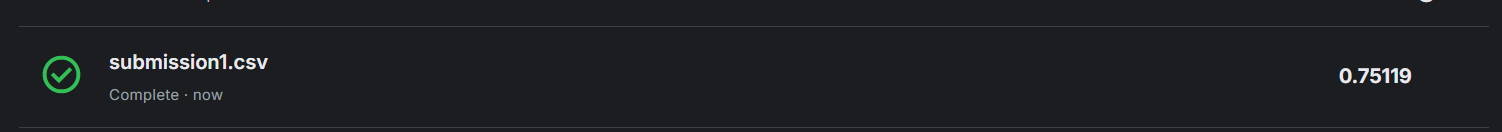

</br>Dengan ini, berarti saya masih gagal karena hanya 75% yang benar dari 418 data yang ada.
</br>Saya akan terus mencoba lagi sampai saya mendapatkan hasil yang saya inginkan.

---